# Import Dependencies

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.orm import Session

# Extract

First, we'll be importing our raw data csvs and loading them into data frames to manipulate.

The 2016 World Happiness Report is a csv file pulled from Kaggle containing data on 157 countries and their happiness levels measured by different aspects of life that contribute to general well-being.

The Happiness Alcohol Consumption csv file is also from Kaggle and contains the consumption of beer, wine, and spirits per capita for 122 countries, 118 of which are outlined in the World Happiness Report.

Both tables contain data from the year 2016.

### Importing the 2016 World Happiness Report

In [2]:
happy_csv_file = "2016 World Happiness Report.csv"
happy_df = pd.read_csv(happy_csv_file)
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### Importing the Happiness Alcohol Consumption file

In [3]:
happy_alc_file = "HappinessAlcoholConsumption.csv"
happy_alc_df = pd.read_csv(happy_alc_file)
happy_alc_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


Now we're going to check how many rows are in each of the data frames we just created and cros reference with our csv files to confirm all data was successfully passed in

In [4]:
len(happy_alc_df.index)

122

In [5]:
len(happy_df.index)

157

# Transform

Looks good! Time to clean up our data. Next, we'll be merging our two dataframes in order to have both the country's alcohol consumption and happiness ranks/scores in one cohesive place.

In [6]:
combined_happy_df = pd.merge(happy_alc_df, happy_df, on='Country')
combined_happy_df.head()

,Country,Region_x,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Region_y,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,Western Europe,...,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,Western Europe,...,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,Western Europe,...,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,Western Europe,...,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,Western Europe,...,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Let's check to see what our final count of countries is and check to see if any columns can be tossed.

In [7]:
len(combined_happy_df.index)

118

In [8]:
combined_happy_df.columns

Index(['Country', 'Region_x', 'Hemisphere', 'HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita',
       'Region_y', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [9]:
combined_happy_df = combined_happy_df.drop(['HDI', 'GDP_PerCapita', 
                                            'Lower Confidence Interval', 'Upper Confidence Interval',
                                           'Region_y'],1)
combined_happy_df.head()

,Country,Region_x,Hemisphere,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,north,7.526,224,81,278,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,north,7.509,185,100,280,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,north,7.501,233,61,78,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,north,7.498,169,71,129,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,north,7.413,263,133,97,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Let's confirm our columns were appropriately updated on our merged data frame.

In [10]:
combined_happy_df.columns

Index(['Country', 'Region_x', 'Hemisphere', 'HappinessScore', 'Beer_PerCapita',
       'Spirit_PerCapita', 'Wine_PerCapita', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

And now we can use this data frame to pull some statistics on the data before grouping by region to run some visualizations

In [11]:
combined_happy_df[['Happiness Score']].describe()

,Happiness Score
count,118.000000
mean,5.557195
std,1.145853
min,3.069000
25%,4.640000
50%,5.553000
75%,6.480250
max,7.526000


### Grouping by Region

We're going to group our data by region and see if there are any significant stand-outs regarding happiness and alcohol consumption

In [12]:
combined_happy_df.Region_x.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa'], dtype=object)

In [13]:
regions_df = combined_happy_df.groupby('Region_x').mean()
regions_df.head()

,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region_x,,,,,,,,,,,,,
Australia and New Zealand,7.323500,232.000000,75.500000,193.500000,8.500000,7.323500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
Central and Eastern Europe,5.365269,167.115385,165.846154,84.230769,78.538462,5.365269,1.067557,0.866329,0.640580,0.300402,0.089141,0.168799,2.232471
Eastern Asia,5.477000,93.250000,149.750000,10.250000,73.500000,5.477000,1.188970,0.916530,0.772915,0.379782,0.081827,0.171365,1.965680
Latin America and Caribbean,6.061000,159.478261,109.913043,35.782609,49.782609,6.061000,0.977496,0.890489,0.605534,0.424838,0.105289,0.207837,2.849490
Middle East and Northern Africa,5.443727,24.818182,41.363636,10.363636,75.636364,5.443727,1.179907,0.685062,0.664625,0.325272,0.173651,0.200153,2.215189


Here, we'll reset the index of the data frame so that our region names can be passed in as a column rather than the data row's index.

In [14]:
regions_df = regions_df.reset_index()
regions_df.head()

,Region_x,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Australia and New Zealand,7.323500,232.000000,75.500000,193.500000,8.500000,7.323500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
1,Central and Eastern Europe,5.365269,167.115385,165.846154,84.230769,78.538462,5.365269,1.067557,0.866329,0.640580,0.300402,0.089141,0.168799,2.232471
2,Eastern Asia,5.477000,93.250000,149.750000,10.250000,73.500000,5.477000,1.188970,0.916530,0.772915,0.379782,0.081827,0.171365,1.965680
3,Latin America and Caribbean,6.061000,159.478261,109.913043,35.782609,49.782609,6.061000,0.977496,0.890489,0.605534,0.424838,0.105289,0.207837,2.849490
4,Middle East and Northern Africa,5.443727,24.818182,41.363636,10.363636,75.636364,5.443727,1.179907,0.685062,0.664625,0.325272,0.173651,0.200153,2.215189


Creating a numpy range to pass into the plot as the x-axis values,

In [15]:
x_range = np.arange(0,len(regions_df.index))

Let's make a bar chart displaying each region's Happiness Score in comparison to other regions from our data frame and compare it to what the average happiness score was overall according to our statistics from earlier.

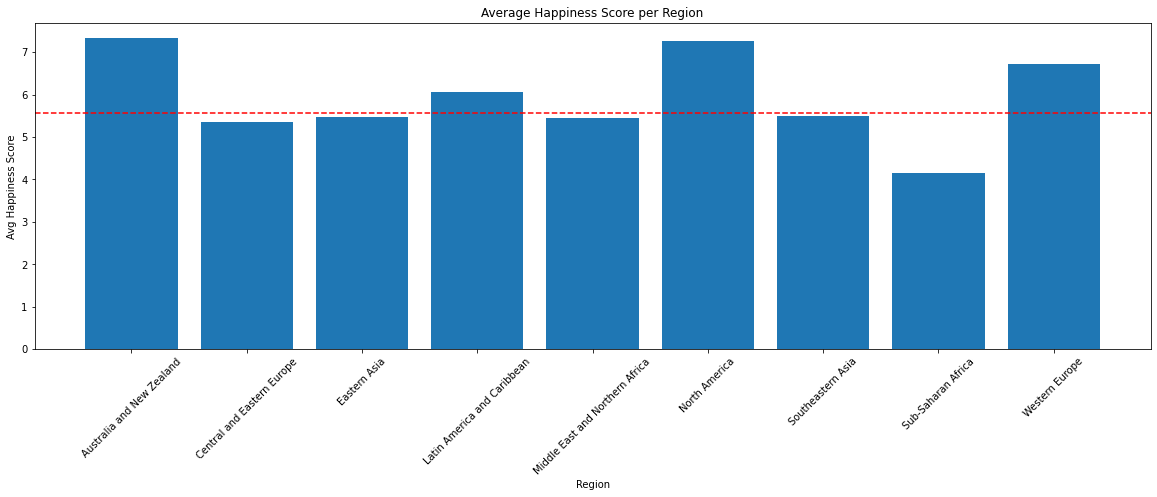

In [16]:
fig, ax = plt.subplots(figsize=(20,6));
ax.bar(x_range, list(regions_df['Happiness Score']));
ax.set_xticks(x_range)
ax.set_xticklabels(list(regions_df['Region_x']), rotation=45);
ax.axhline(5.56, color = 'red', linestyle = '--');
ax.set(title = 'Average Happiness Score per Region', xlabel = 'Region', ylabel = 'Avg Happiness Score');

Let's also plot some scatter plots to see if we can find any correlation between the alcohol consumption and happiness scores for the countries within our data frame

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


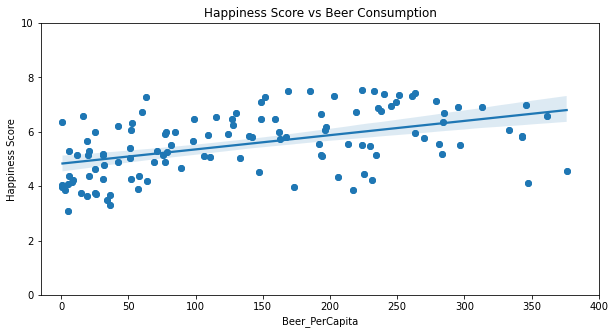

In [17]:
fig2, ax2 = plt.subplots(figsize=(10,5));
ax2.scatter(combined_happy_df[['Beer_PerCapita']], combined_happy_df[['Happiness Score']]);
ax2.set(title = 'Happiness Score vs Beer Consumption', xlabel = 'Beer Consumption Per Capita', 
       ylabel = 'Happiness Score per Country');
plt.ylim(0,10);
plt.xlim(-15,400);

x = combined_happy_df[['Beer_PerCapita']]
y = combined_happy_df[['Happiness Score']]

import seaborn as sns
sns.regplot(x, y);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


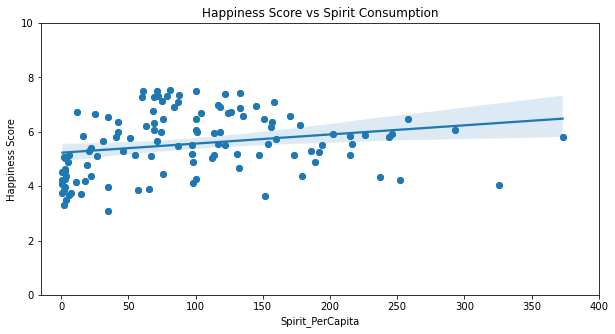

In [18]:
fig3, ax3 = plt.subplots(figsize=(10,5));
ax3.scatter(combined_happy_df[['Spirit_PerCapita']], combined_happy_df[['Happiness Score']]);
ax3.set(title = 'Happiness Score vs Spirit Consumption', xlabel = 'Spirit Consumption Per Capita', 
       ylabel = 'Happiness Score per Country');
plt.ylim(0,10);
plt.xlim(-15,400);

x = combined_happy_df[['Spirit_PerCapita']]
y = combined_happy_df[['Happiness Score']]

import seaborn as sns
sns.regplot(x, y);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


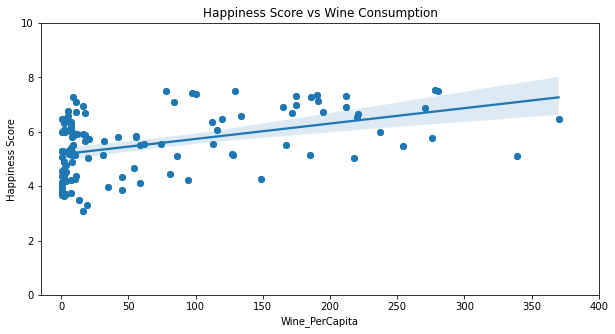

In [19]:
fig4, ax4 = plt.subplots(figsize=(10,5));
ax4.scatter(combined_happy_df[['Wine_PerCapita']], combined_happy_df[['Happiness Score']]);
ax4.set(title = 'Happiness Score vs Wine Consumption', xlabel = 'Wine Consumption Per Capita', 
       ylabel = 'Happiness Score per Country');
plt.ylim(0,10);
plt.xlim(-15,400);

x = combined_happy_df[['Wine_PerCapita']]
y = combined_happy_df[['Happiness Score']]

import seaborn as sns
sns.regplot(x, y);

Based on our graphs, it looks like there is a possible positive correlation between alcohol consumption and happiness

Before moving forward, we'll rename our columns to get rid of any spaces/typos/etc.

In [20]:
combined_happy_df_rename = combined_happy_df.rename(columns = {'Region_x': 'Region', 
                                                               'Happiness Rank':'Happiness_Rank',
                                                               'Happiness Score':'Happiness_Score',
                                                               'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 
                                                               'Health (Life Expectancy)': 'Life_Expectancy',
                                                               'Trust (Government Corruption)':'Government_Corruption',
                                                              'Dystopia Residual': 'Dystopia_Residual'})
combined_happy_df_rename.columns

Index(['Country', 'Region', 'Hemisphere', 'HappinessScore', 'Beer_PerCapita',
       'Spirit_PerCapita', 'Wine_PerCapita', 'Happiness_Rank',
       'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')

# Load

Now that we've explored our data, we'll connect to our postgres database and load in what we found. First, we'll install psycopg2 to avoid possible errors.

In [21]:
!pip install psycopg2

Once this is complete, we can make a connection to our data base and pass in our merged and cleaned data frame as well as create some more specialized tables and load those into our database as well

In [22]:
connection_string = "postgres:postgres@localhost:5432/happy_db"
engine = create_engine(f'postgresql://{connection_string}')

In [23]:
combined_happy_df_rename.to_sql(name='happy', con=engine, if_exists='replace', index=False)

Confirm our table was successfully loaded

In [24]:
engine.table_names()

['happy']

### Import and establish Base for class that will be constructed 

In [25]:
Base = declarative_base()

In [26]:
class Country_Happy(Base):
    __tablename__ = 'happy'
    __table_args__ = {'extend_existing': True}
    #id = Column(Integer, primary_key=True)
    Country = Column(String(255))
    Region = Column(String(255))
    Hemisphere = Column(String(255)) 
    Happiness_Rank = Column(Integer, primary_key=True) 
    Happiness_Score = Column(Float)
    Beer_PerCapita = Column(Float)
    Spirit_PerCapita = Column(Float)
    Wine_PerCapita = Column(Float)
    Economy_GDP_per_Capita = Column(Float)
    Family = Column(Float)
    Life_Expectancy = Column(Float) 
    Freedom = Column(Float) 
    Government_Corruption = Column(Float)
    Generosity = Column(Float)
    Dystopia_Residual = Column(Float)

In [27]:
Base.metadata.create_all(engine)

In [28]:
session = Session(bind=engine)

Let's pull and print out the top 5 happy countries and their alcohol consumption and then do the same for the 5 least happy countries from our data

In [29]:
countries_list = session.query(Country_Happy).order_by(Country_Happy.Happiness_Rank)
for country in countries_list[:5]:
    print("-"*10)
    print(f"Country: {country.Country}")
    print(f"Happiness_Rank: {country.Happiness_Rank}")
    print(f"Region: {country.Region}")
    print(f"Happiness_Score: {country.Happiness_Score}")
    print(f"Beer Consumption (Per Capita): {country.Beer_PerCapita}")
    print(f"Wine Consumption (Per Capita): {country.Wine_PerCapita}")
    print(f"Spirit Consumption (Per Capita): {country.Spirit_PerCapita}")

----------
Country: Denmark
Happiness_Rank: 1
Region: Western Europe
Happiness_Score: 7.526
Beer Consumption (Per Capita): 224.0
Wine Consumption (Per Capita): 278.0
Spirit Consumption (Per Capita): 81.0
----------
Country: Switzerland
Happiness_Rank: 2
Region: Western Europe
Happiness_Score: 7.5089999999999995
Beer Consumption (Per Capita): 185.0
Wine Consumption (Per Capita): 280.0
Spirit Consumption (Per Capita): 100.0
----------
Country: Iceland
Happiness_Rank: 3
Region: Western Europe
Happiness_Score: 7.501
Beer Consumption (Per Capita): 233.0
Wine Consumption (Per Capita): 78.0
Spirit Consumption (Per Capita): 61.0
----------
Country: Norway
Happiness_Rank: 4
Region: Western Europe
Happiness_Score: 7.497999999999999
Beer Consumption (Per Capita): 169.0
Wine Consumption (Per Capita): 129.0
Spirit Consumption (Per Capita): 71.0
----------
Country: Finland
Happiness_Rank: 5
Region: Western Europe
Happiness_Score: 7.412999999999999
Beer Consumption (Per Capita): 263.0
Wine Consumptio

In [30]:
for country in countries_list[-5:]:
    print("-"*10)
    print(f"Country: {country.Country}")
    print(f"Happiness_Rank: {country.Happiness_Rank}")
    print(f"Region: {country.Region}")
    print(f"Happiness_Score: {country.Happiness_Score}")
    print(f"Beer Consumption (Per Capita): {country.Beer_PerCapita}")
    print(f"Wine Consumption (Per Capita): {country.Wine_PerCapita}")
    print(f"Spirit Consumption (Per Capita): {country.Spirit_PerCapita}")

----------
Country: Tanzania
Happiness_Rank: 149
Region: Sub-Saharan Africa
Happiness_Score: 3.6660000000000004
Beer Consumption (Per Capita): 36.0
Wine Consumption (Per Capita): 1.0
Spirit Consumption (Per Capita): 6.0
----------
Country: Liberia
Happiness_Rank: 150
Region: Sub-Saharan Africa
Happiness_Score: 3.622
Beer Consumption (Per Capita): 19.0
Wine Consumption (Per Capita): 2.0
Spirit Consumption (Per Capita): 152.0
----------
Country: Benin
Happiness_Rank: 153
Region: Sub-Saharan Africa
Happiness_Score: 3.484
Beer Consumption (Per Capita): 34.0
Wine Consumption (Per Capita): 13.0
Spirit Consumption (Per Capita): 4.0
----------
Country: Togo
Happiness_Rank: 155
Region: Sub-Saharan Africa
Happiness_Score: 3.303
Beer Consumption (Per Capita): 36.0
Wine Consumption (Per Capita): 19.0
Spirit Consumption (Per Capita): 2.0
----------
Country: Syria
Happiness_Rank: 156
Region: Middle East and Northern Africa
Happiness_Score: 3.069
Beer Consumption (Per Capita): 5.0
Wine Consumption (P

In [31]:
session.close()

In conclusion, it looks like happier countries and regions tend to consume more alcohol per capita so it may be time to pick up a pint of your favorite beer if you want to live your best life.